In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


 ### Dataset contains pixel values of images, 1 image has 784 pixels that means 784 features per image

In [32]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt

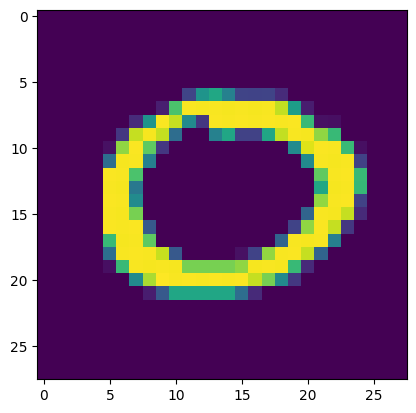

In [8]:
# image plotting
plt.imshow(df.iloc[10010, 1:].values.reshape(28,28))

In [33]:
X = df.iloc[:, 1:] # pixel values will be the training data
y = df.iloc[:, 0] # label will be the target

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% data will be testing data rest will be used for training

In [15]:
X_train.shape

(33600, 784)

In [16]:
# knn
# finds the similar images to given image and majority similar results will be returned
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# this step will consume much more time because because we're dealing with 784 dimensional data and that's why we're using PCA to reduce computation time
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.179761409759521


#### Didn't took much time (13 secs) due to nice hardware, but on local machine it will consume lot more time and 13 secs also considered as a big value in ML

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

# Using PCA

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
# scaling data: mean centering
X_train = scaler.fit_transform(X_train) # transformer learns about the parameters in data then applies the data transformation
X_test = scaler.transform(X_test) # applying same transformation on testing data

In [45]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200) # n_components: no. of principle components

In [46]:
# dimensionality reduction
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [47]:
X_train.shape

(33600, 784)

In [48]:
X_train_trf.shape

(33600, 200)

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(X_test_trf)

In [51]:
accuracy_score(y_test, y_pred)

0.9504761904761905

In [56]:
best_score = 0.0
index = -1
for i in range(1, 785):
    pca = PCA(n_components=i)
    
    # dimensionality reduction
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    # train model
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    score = accuracy_score(y_test, y_pred)
    print(i, " ", score)
    if(score > best_score):
        best_score = score
        index = i

1   0.25845238095238093
2   0.3242857142857143
3   0.5102380952380953
4   0.6660714285714285
5   0.7378571428571429
6   0.8223809523809524
7   0.843452380952381
8   0.8726190476190476
9   0.8864285714285715
10   0.9058333333333334
11   0.9110714285714285
12   0.9176190476190477
13   0.9275
14   0.9352380952380952
15   0.9392857142857143
16   0.9380952380952381
17   0.9401190476190476
18   0.9413095238095238
19   0.9442857142857143
20   0.9429761904761905
21   0.9428571428571428
22   0.9442857142857143
23   0.9446428571428571
24   0.9457142857142857
25   0.9480952380952381
26   0.9479761904761905
27   0.9477380952380953
28   0.9482142857142857
29   0.9492857142857143
30   0.949047619047619
31   0.9507142857142857
32   0.9514285714285714
33   0.9511904761904761
34   0.9510714285714286
35   0.9523809523809523
36   0.9520238095238095
37   0.9521428571428572
38   0.9533333333333334
39   0.9539285714285715
40   0.9534523809523809
41   0.9528571428571428
42   0.9517857142857142
43   0.9535714

KeyboardInterrupt: 

In [57]:
print(index)
print(best_score)

80
0.9561904761904761


## PCA used for Visualizations

In [58]:
# transoforming to 2d system, only 2 principle components
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [59]:
X_train_trf

array([[-2.71862551, -0.48982972],
       [-0.67701746, -6.7536861 ],
       [-3.03322697,  6.50984847],
       ...,
       [ 2.14880507,  0.78062214],
       [ 1.05959639,  0.94756171],
       [17.70259989,  1.96192432]])

In [60]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:, 1], color=y_train_trf, color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [66]:
# transoforming to 3d system, only 3 principle components
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [67]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:, 0], y=X_train_trf[:, 1], z=X_train_trf[:, 2], color=y_train_trf)

fig.update_layout(
margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [69]:
# explained variance: Eigen Values
pca.explained_variance_

array([40.67111198, 29.17023391, 26.74459617])

In [71]:
# Eigen Vectors - 3 vectors of 784-D

# pca.components_
pca.components_.shape

(3, 784)

In [72]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [73]:
# checking variance sum
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

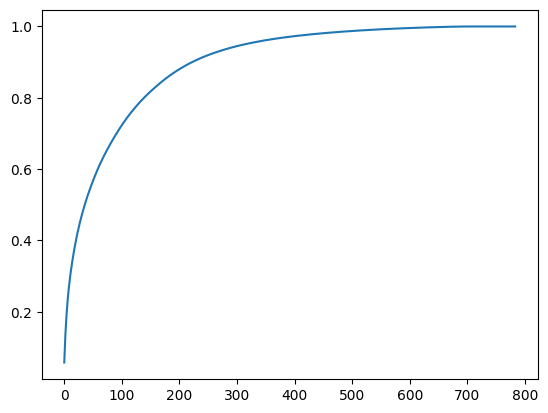

In [76]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))